In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
cus_data = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

In [6]:
cus_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [7]:
cus_data['booking_complete'].unique()

array([0, 1], dtype=int64)

In [8]:
cus_data['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [9]:
cus_data['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [10]:
cus_data['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [11]:
cus_data['flight_duration'].unique()

array([5.52, 5.07, 7.57, 6.62, 7.  , 4.75, 8.83, 7.42, 6.42, 5.33, 4.67,
       5.62, 8.58, 8.67, 4.72, 8.15, 6.33, 5.  , 4.83, 9.5 , 5.13])

In [12]:
cusData = cus_data.drop(['route','booking_origin'], axis = 1)

In [13]:
cusData.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,1,0,1,5.52,0


In [14]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

cusData["flight_day"] = cusData["flight_day"].map(mapping)

maping = {
    'Internet': 1,
    'Mobile': 0
}
cusData['sales_channel']= cusData['sales_channel'].map(maping)

mapp = {
    'RoundTrip': 2,
    'CircleTrip':0,
    'OneWay':1
}
cusData['trip_type']= cusData['trip_type'].map(mapp)

In [15]:
cusData.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,2,262,19,7,6,1,0,0,5.52,0
1,1,1,2,112,20,3,6,0,0,0,5.52,0
2,2,1,2,243,22,17,3,1,1,0,5.52,0
3,1,1,2,96,31,4,6,0,0,1,5.52,0
4,2,1,2,68,22,15,3,1,0,1,5.52,0


In [16]:
cusData.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.887640,1.987620,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.129873,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,1.000000,2.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,1.000000,2.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,1.000000,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [17]:
cusData['booking_complete'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: booking_complete
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB


<Axes: >

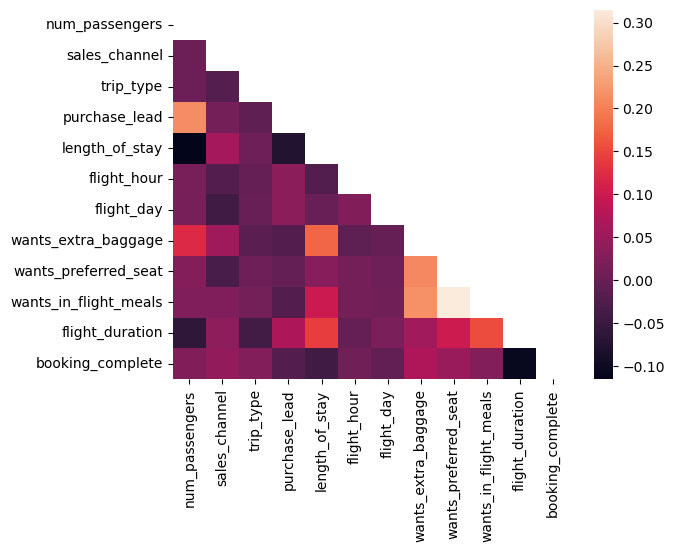

In [39]:
#checking for relationships
mask = np.triu(np.ones_like(cusData.corr())) 
sns.heatmap(cusData.corr(), mask=mask)

sns.heatmap(cusData.corr())

<Axes: xlabel='purchase_lead', ylabel='num_passengers'>

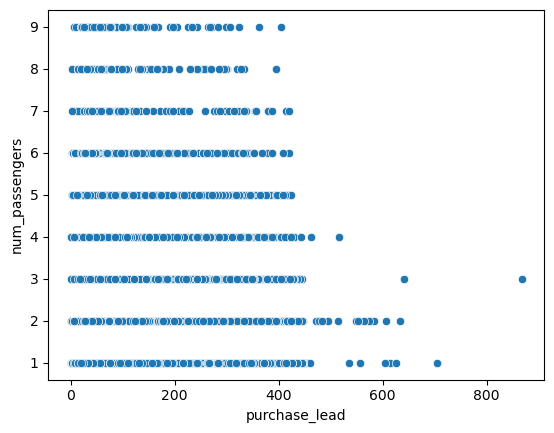

In [19]:
sns.scatterplot(cusData, y = 'num_passengers', x = 'purchase_lead')

<Axes: >

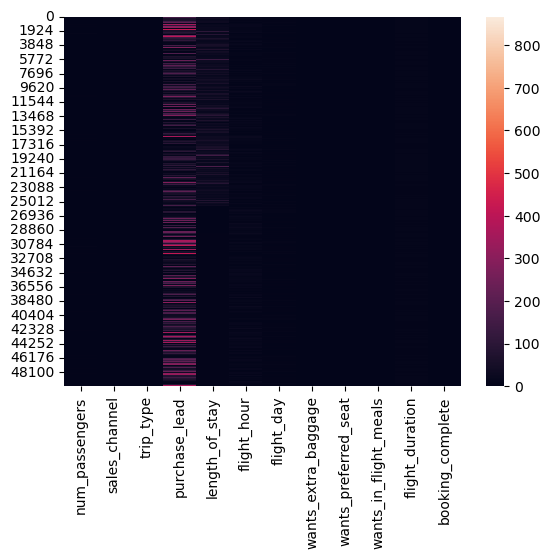

In [32]:
sns.heatmap(cusData)

In [21]:
X = cusData.drop('booking_complete', axis=1)

In [22]:
y = cusData['booking_complete']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
model = LogisticRegression()



In [26]:
#Training the model
model.fit(X_train, y_train)

C:\Users\tolao\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_predict = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.8522666666666666
[[12784     0]
 [ 2216     0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12784
           1       0.00      0.00      0.00      2216

    accuracy                           0.85     15000
   macro avg       0.43      0.50      0.46     15000
weighted avg       0.73      0.85      0.78     15000



C:\Users\tolao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tolao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tolao\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
